# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
Department of Disease Control of Thailand (2020), https://covid19.th-stat.com/
World Health Organization (2020), https://covid19.who.int
Ireland Health Protection Surveillance Centre (HPSC) and Health Service Executive (HSE) (2020), https://covid19ireland-geohive.hub.arcgis.com/
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Taiwan Ministry of Health and Welfare (2020), https://data.gov.tw/dataset/120711
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
Department of Disease Control of Thailand (2020), https://covid19.th-stat.com/
World Health Organization (2020), https://covid19.who.int
Ireland Health Protection Surveillance Centre (HPSC) and Health Service Executive (HSE) (2020), https://covid19ireland-geohive.hub.arcgis.com/
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Taiwan Ministry of Health and Welfare (2020), https://data.gov.tw/dataset/120711
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
261479,2020-09-19,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
261480,2020-09-20,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
261481,2020-09-21,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
261482,2020-09-22,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
261483,2020-09-23,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
261479,2020-09-19,Colombia,Vichada,14,0,0,14
261480,2020-09-20,Colombia,Vichada,14,0,0,14
261481,2020-09-21,Colombia,Vichada,14,0,0,14
261482,2020-09-22,Colombia,Vichada,14,0,0,14
261483,2020-09-23,Colombia,Vichada,14,0,0,14


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
184,2020-09-19,24046,2448,390,21208
185,2020-09-20,24208,2440,390,21378
186,2020-09-21,24306,2443,391,21472
187,2020-09-22,24394,2463,391,21540
188,2020-09-23,24453,2522,391,21540


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-09-19,30533907,8782330,952852,20798725,0.015603,0.340584,0.043806
2020-09-20,30777840,8799441,956323,21022076,0.015536,0.341513,0.043512
2020-09-21,31040738,8819609,960123,21261006,0.015466,0.342469,0.043208
2020-09-22,31308696,8869675,965853,21473168,0.015425,0.342927,0.043043
2020-09-23,31308844,8941435,965853,21401556,0.015425,0.341781,0.043181


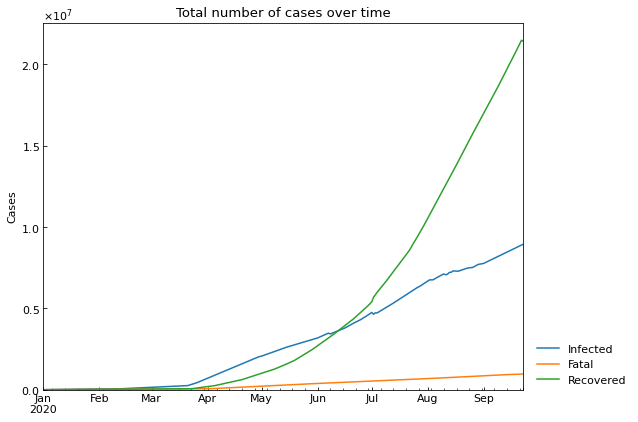

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
223,2020-09-19,78682,6744,1502,70436
224,2020-09-20,79162,6651,1506,71005
225,2020-09-21,79473,6582,1513,71378
226,2020-09-22,79804,6672,1518,71614
227,2020-09-23,79936,78418,1518,70658


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
221,2020-09-19,78073,6083,1495,70495
222,2020-09-20,78657,6127,1500,71030
223,2020-09-21,79140,6236,1500,71404
224,2020-09-22,79438,6282,1508,71648
225,2020-09-23,79768,6275,1512,71981


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
261479,2020-09-19,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
261480,2020-09-20,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
261481,2020-09-21,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
261482,2020-09-22,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
261483,2020-09-23,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
223335,COL,Colombia,Vichada,2020-09-19,107808
223336,COL,Colombia,Vichada,2020-09-20,107808
223337,COL,Colombia,Vichada,2020-09-21,107808
223338,COL,Colombia,Vichada,2020-09-22,107808
223339,COL,Colombia,Vichada,2020-09-23,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
261479,2020-09-19,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
261480,2020-09-20,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
261481,2020-09-21,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
261482,2020-09-22,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
261483,2020-09-23,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
261479,2020-09-19,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
261480,2020-09-20,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
261481,2020-09-21,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
261482,2020-09-22,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
261483,2020-09-23,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
262,2020-09-19,1,1,1,0,0,1,1,3,2,2,1,37.04
263,2020-09-20,1,1,1,0,0,1,1,3,2,2,1,37.04
264,2020-09-21,1,1,1,0,0,1,1,3,2,2,1,37.04
265,2020-09-22,1,1,1,0,0,1,1,3,2,2,1,37.04
266,2020-09-23,1,1,1,0,0,1,1,3,2,2,1,37.04


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
262,2020-09-19,1,1,1,0,0,1,1,3,2,2,1,37.04
263,2020-09-20,1,1,1,0,0,1,1,3,2,2,1,37.04
264,2020-09-21,1,1,1,0,0,1,1,3,2,2,1,37.04
265,2020-09-22,1,1,1,0,0,1,1,3,2,2,1,37.04
266,2020-09-23,1,1,1,0,0,1,1,3,2,2,1,37.04


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

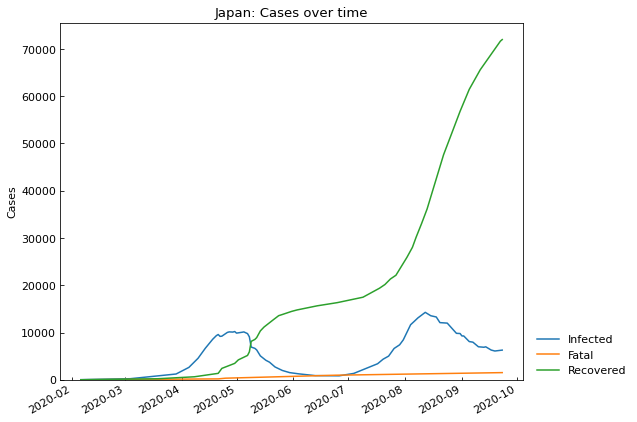

,Date,Confirmed,Infected,Fatal,Recovered
221,2020-09-19,78073,6083,1495,70495
222,2020-09-20,78657,6127,1500,71030
223,2020-09-21,79140,6236,1500,71404
224,2020-09-22,79438,6282,1508,71648
225,2020-09-23,79768,6275,1512,71981


In [26]:
import matplotlib
warnings.simplefilter("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

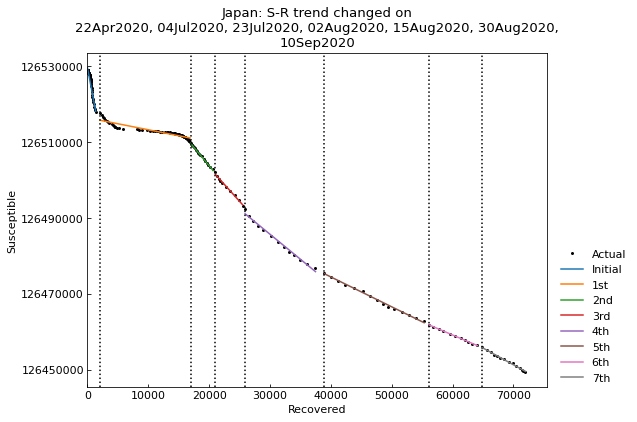

,Type,Start,End,Population
0th,Past,06Feb2020,21Apr2020,126529100
1st,Past,22Apr2020,03Jul2020,126529100
2nd,Past,04Jul2020,22Jul2020,126529100
3rd,Past,23Jul2020,01Aug2020,126529100
4th,Past,02Aug2020,14Aug2020,126529100
5th,Past,15Aug2020,29Aug2020,126529100
6th,Past,30Aug2020,09Sep2020,126529100
7th,Past,10Sep2020,23Sep2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	7th phase (10Sep2020 - 23Sep2020): finished  666 trials in 0 min 20 sec

	3rd phase (23Jul2020 - 01Aug2020): finished  671 trials in 0 min 15 sec

	2nd phase (04Jul2020 - 22Jul2020): finished 1870 trials in 1 min  0 sec

	0th phase (06Feb2020 - 21Apr2020): finished 1771 trials in 1 min  0 sec

	1st phase (22Apr2020 - 03Jul2020): finished 1797 trials in 1 min  0 sec

	6th phase (30Aug2020 - 09Sep2020): finished  232 trials in 0 min  5 sec

	4th phase (02Aug2020 - 14Aug2020): finished 1832 trials in 1 min  0 sec

	5th phase (15Aug2020 - 29Aug2020): finished 1626 trials in 0 min 45 sec

Completed optimization. Total: 2 min  6 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/alpha2 [day],1/gamma [day],1/beta [day],alpha1 [-],RMSLE,Trials,Runtime
0th,Past,06Feb2020,21Apr2020,126529100,SIR-F,4.30,0.019837,0.000066,0.034879,0.007885,480,5064,42,9,0.020,0.948305,1771,1 min 0 sec
1st,Past,22Apr2020,03Jul2020,126529100,SIR-F,0.36,0.094608,0.000238,0.009029,0.022170,480,1399,15,36,0.095,0.820420,1797,1 min 0 sec
2nd,Past,04Jul2020,22Jul2020,126529100,SIR-F,2.02,0.000938,0.000031,0.048202,0.023859,480,10652,13,6,0.001,0.038903,1870,1 min 0 sec
3rd,Past,23Jul2020,01Aug2020,126529100,SIR-F,1.87,0.000250,0.000076,0.048058,0.025638,480,4393,13,6,0.000,0.032716,671,0 min 15 sec
4th,Past,02Aug2020,14Aug2020,126529100,SIR-F,1.49,0.000235,0.000131,0.034510,0.022957,480,2544,14,9,0.000,0.064337,1832,1 min 0 sec
5th,Past,15Aug2020,29Aug2020,126529100,SIR-F,0.80,0.000530,0.000290,0.027540,0.034007,480,1150,9,12,0.001,0.026512,1626,0 min 45 sec
6th,Past,30Aug2020,09Sep2020,126529100,SIR-F,0.72,0.019866,0.000002,0.022585,0.030644,480,179885,10,14,0.020,0.019375,232,0 min 5 sec
7th,Past,10Sep2020,23Sep2020,126529100,SIR-F,0.87,0.000250,0.000357,0.025799,0.029433,480,934,11,12,0.000,0.023324,666,0 min 20 sec


### Accuracy of estimation

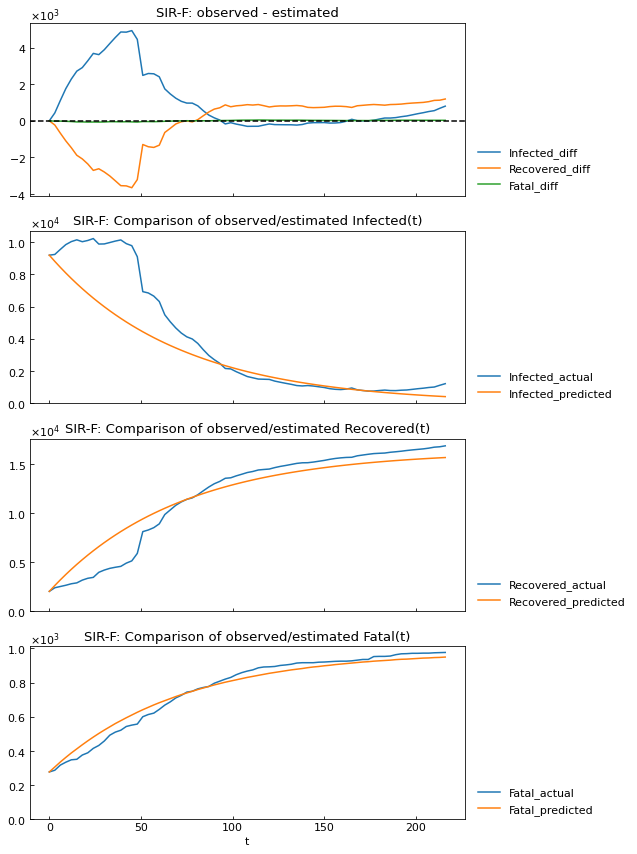

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.49

### Show parameter history

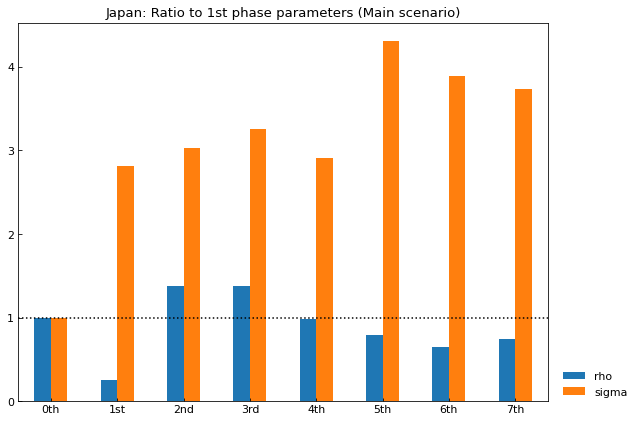

,0th,1st,2nd,3rd,4th,5th,6th,7th
rho,1.0,0.258858,1.381972,1.377843,0.989414,0.789582,0.647517,0.739681
sigma,1.0,2.811529,3.025681,3.251232,2.911338,4.312564,3.886155,3.732545


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

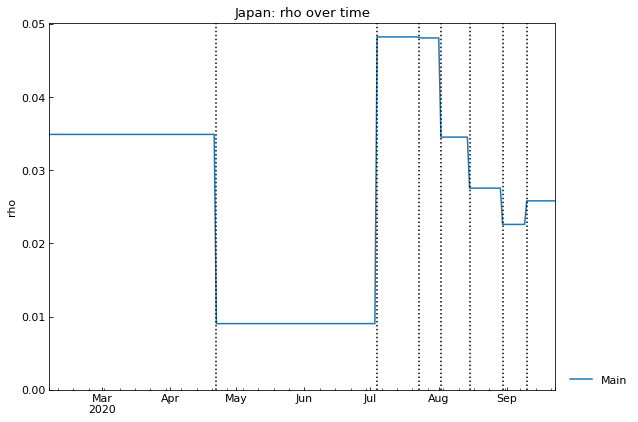

In [33]:
# version >= 2.8.0
_ = scenario.history(target="rho")

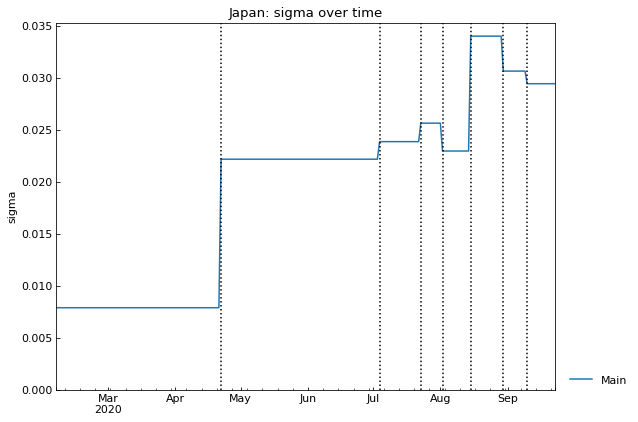

In [34]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

### Show the history of reproduction number

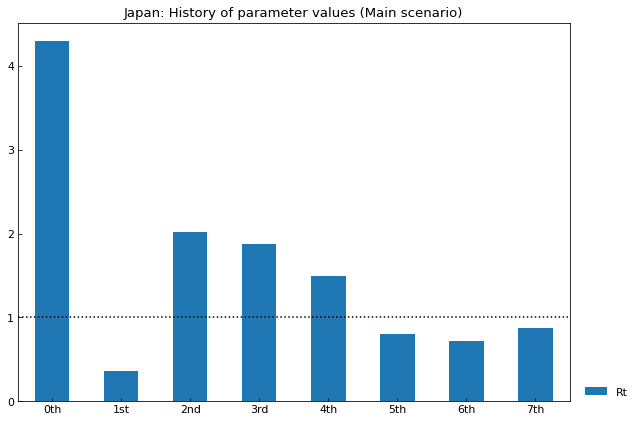

,0th,1st,2nd,3rd,4th,5th,6th,7th
Rt,4.3,0.36,2.02,1.87,1.49,0.8,0.72,0.87


In [35]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

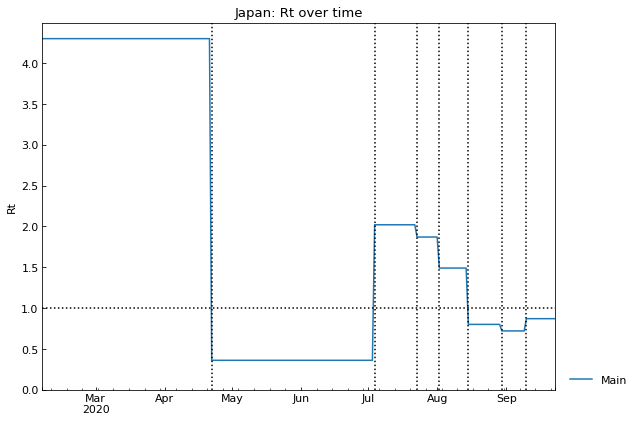

In [36]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

### Simulate the number of cases

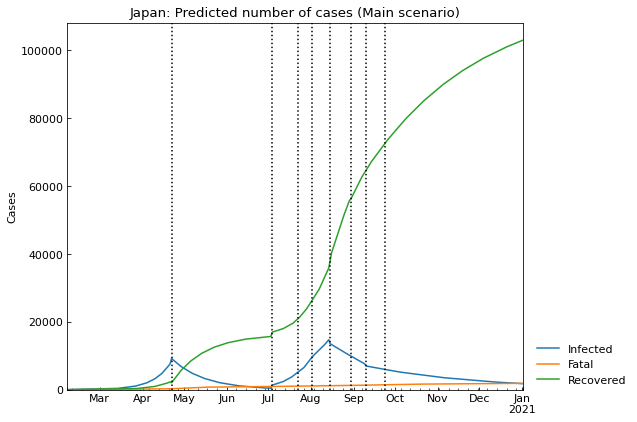

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,106109,1869,1858,102382
328,2020-12-30,106251,1871,1835,102545
329,2020-12-31,106392,1873,1813,102706
330,2021-01-01,106532,1875,1792,102865
331,2021-01-02,106669,1877,1770,103022


In [37]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [38]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.029432974268653704

In [39]:
sigma_new = sigma_current * 2
sigma_new

0.05886594853730741

In [40]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.30   
         1st      Past  22Apr2020  03Jul2020   126529100  SIR-F  0.36   
         2nd      Past  04Jul2020  22Jul2020   126529100  SIR-F  2.02   
         3rd      Past  23Jul2020  01Aug2020   126529100  SIR-F  1.87   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.49   
         5th      Past  15Aug2020  29Aug2020   126529100  SIR-F  0.80   
         6th      Past  30Aug2020  09Sep2020   126529100  SIR-F  0.72   
         7th      Past  10Sep2020  23Sep2020   126529100  SIR-F  0.87   
         8th    Future  24Sep2020  01Jan2021   126529100  SIR-F  0.87   
Medicine 0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.30   
         1st      Past  22Apr2020  03Jul2020   126529100  SIR-F  0.36   
         2nd      Past  04Jul2020  22Jul2020   126529100  SIR-F  2.02   
         3rd      Past  23Jul2020  01Aug2020   126529100  SIR-F  1.87   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.49   
         5th      Past  15Aug2020  29Aug2020   126529100  SIR-F  0.80   
         6th      Past  30Aug2020  09Sep2020   126529100  SIR-F  0.72   
         7th      Past  10Sep2020  23Sep2020   126529100  SIR-F  0.87   
         8th    Future  24Sep2020  23Oct2020   126529100  SIR-F  0.87   
         9th    Future  24Oct2020  01Jan2021   126529100  SIR-F  0.44   

                   theta     kappa       rho     sigma  tau  1/alpha2 [day]  \
Scenario Phase                                                                
Main     0th    0.019837  0.000066  0.034879  0.007885  480            5064   
         1st    0.094608  0.000238  0.009029  0.022170  480            1399   
         2nd    0.000938  0.000031  0.048202  0.023859  480           10652   
         3rd    0.000250  0.000076  0.048058  0.025638  480            4393   
         4th    0.000235  0.000131  0.034510  0.022957  480            2544   
         5th    0.000530  0.000290  0.027540  0.034007  480            1150   
         6th    0.019866  0.000002  0.022585  0.030644  480          179885   
         7th    0.000250  0.000357  0.025799  0.029433  480             934   
         8th    0.000250  0.000357  0.025799  0.029433  480             934   
Medicine 0th    0.019837  0.000066  0.034879  0.007885  480            5064   
         1st    0.094608  0.000238  0.009029  0.022170  480            1399   
         2nd    0.000938  0.000031  0.048202  0.023859  480           10652   
         3rd    0.000250  0.000076  0.048058  0.025638  480            4393   
         4th    0.000235  0.000131  0.034510  0.022957  480            2544   
         5th    0.000530  0.000290  0.027540  0.034007  480            1150   
         6th    0.019866  0.000002  0.022585  0.030644  480          179885   
         7th    0.000250  0.000357  0.025799  0.029433  480             934   
         8th    0.000250  0.000357  0.025799  0.029433  480             934   
         9th    0.000250  0.000357  0.025799  0.058866  480             934   

                1/gamma [day]  1/beta [day]  alpha1 [-]      RMSLE Trials  \
Scenario Phase                                                              
Main     0th               42             9       0.020   0.948305   1771   
         1st               15            36       0.095    0.82042   1797   
         2nd               13             6       0.001  0.0389028   1870   
         3rd               13             6       0.000  0.0327165    671   
         4th               14             9       0.000  0.0643374   1832   
         5th                9            12       0.001  0.0265116   1626   
         6th               10            14       0.020  0.0193749    232   
         7th               11            12       0.000  0.0233244    666   
         8th               11            12       0.00

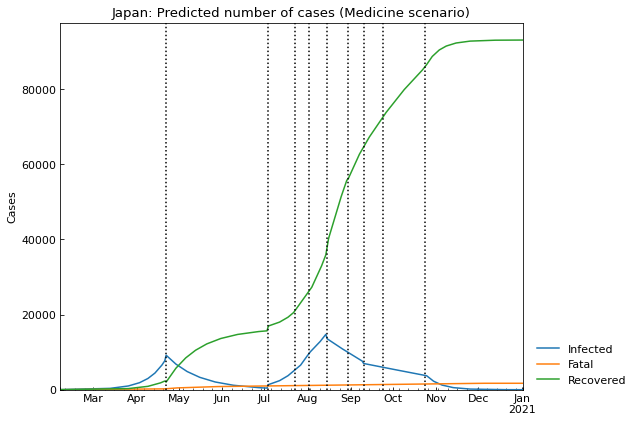

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,94825,1711,5,93109
328,2020-12-30,94826,1711,5,93110
329,2020-12-31,94826,1711,5,93110
330,2021-01-01,94826,1711,4,93111
331,2021-01-02,94827,1711,4,93112


In [41]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [42]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,9th_Rt
Main,14731,14Aug2020,1770,1877,-
Medicine,14731,14Aug2020,4,1711,0.44


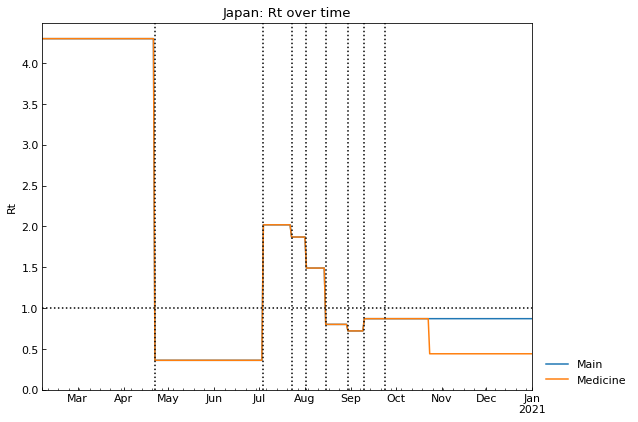

In [43]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

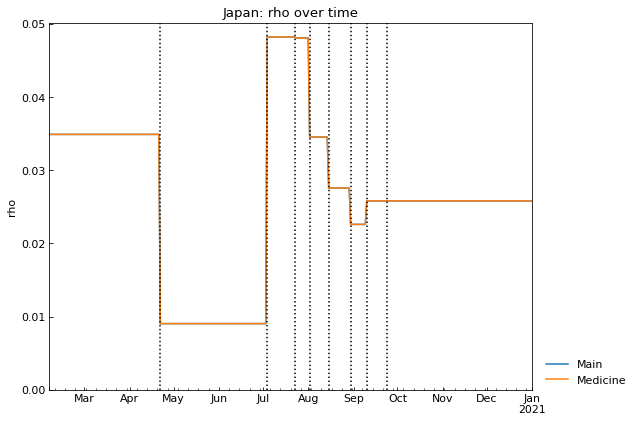

In [44]:
# version >= 2.8.0
_ = scenario.history(target="rho")

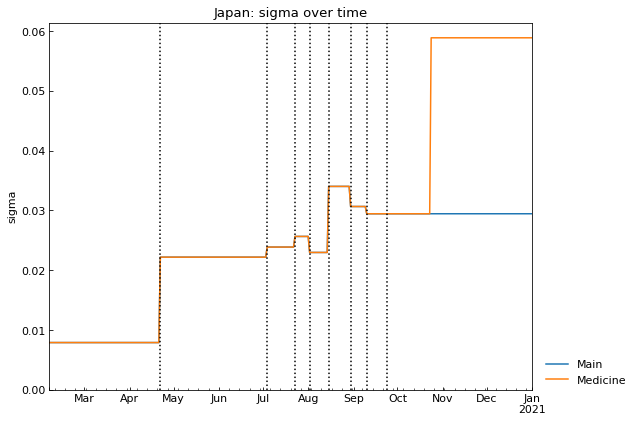

In [45]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

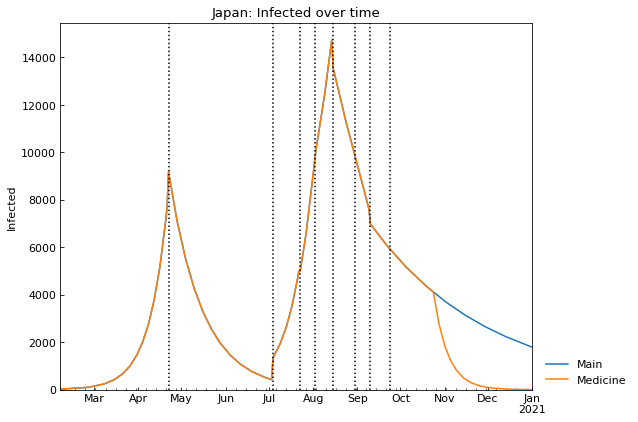

In [46]:
# version >= 2.8.0
_ = scenario.history(target="Infected")